### Shehreyar Ali

### sa03576

### sa03576@st.habib.edu.pk

### Final Project: College Scorecard Data

In this project we will be working with college and university data from the website data.gov from the following link

https://catalog.data.gov/dataset/college-scorecard/resource/2a7f670e-0799-436a-9394-df0a9b3ba7c5

### 1. First we are going to load the dataset and the required libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from scipy import stats

collegeDataRaw = pd.read_csv('MERGED2010_11_PP.csv', low_memory = False)
cDR = collegeDataRaw
cDR.info()
cDR.head()
cDR.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Columns: 1977 entries, UNITID to OMENRUP_PARTTIME_POOLED_SUPP
dtypes: float64(813), int64(10), object(1154)
memory usage: 111.8+ MB


,UNITID,OPEID6,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
count,7.414000e+03,7414.000000,0.0,0.0,0.0,7289.000000,0.0,7414.000000,7414.000000,7414.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.170640e+06,15227.400998,NaN,NaN,NaN,1.931541,NaN,0.772458,6.160372,1.850283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.412116e+06,12966.137681,NaN,NaN,NaN,0.876799,NaN,0.419274,19.131706,1.002076,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.006540e+05,1002.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.680610e+05,3329.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.194620e+05,10141.000000,NaN,NaN,NaN,2.000000,NaN,1.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.349438e+05,25234.750000,NaN,NaN,NaN,3.000000,NaN,1.000000,2.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.589730e+07,41756.000000,NaN,NaN,NaN,3.000000,NaN,1.000000,119.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Selecting the Columns


In [123]:
cols = ['UNITID', 'INSTNM', 'CITY', 'STABBR', 'NUMBRANCH', 'HIGHDEG', 'PREDDEG', 'CONTROL', 'TUITFTE', 'AVGFACSAL', 'ADM_RATE_ALL', 'SAT_AVG','SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'ACTCM25', 'ACTCM75', 'UGDS', 'UG25ABV', 'PCTFLOAN', 'CDR3']

cDC = cDR[cols]

cDC.shape

collegeDataClean = cDC.copy()

### 3. Cleaning

In [124]:
print(collegeDataClean.isnull().values.sum())

66769


In [125]:
collegeDataClean.fillna(collegeDataClean.mean(), inplace = True)
print(collegeDataClean.isnull().values.sum())

14828


In [126]:
print(collegeDataClean.count)

<bound method DataFrame.count of         UNITID                                INSTNM              CITY STABBR  \
0       100654              Alabama A & M University            Normal     AL   
1       100663   University of Alabama at Birmingham        Birmingham     AL   
2       100690                    Amridge University        Montgomery     AL   
3       100706   University of Alabama in Huntsville        Huntsville     AL   
4       100724              Alabama State University        Montgomery     AL   
...        ...                                   ...               ...    ...   
7409  45896402  Strayer University-Charleston Campus  North Charleston     SC   
7410  45897301             Strayer University-Irving            Irving     TX   
7411  45897302               Strayer University-Katy           Houston     TX   
7412  45897303  Strayer University-Northwest Houston           Houston     TX   
7413  45897304              Strayer University-Plano             Plano     T

In [127]:
collegeDataClean['HIGHDEG'].replace(to_replace = {0 : np.nan,
1 : 'Certificate', 2 : "Associate's", 3 : "Bachelor's", 4 : "Graduate's"}, 
inplace = True)

collegeDataClean['PREDDEG'].replace(to_replace = {0: np.nan, 
1:'Certificate', 2:"Associate's", 3:"Bachelor's", 4:"Graduate's"}, 
inplace = True)

In [128]:
collegeDataClean['HIGHDEG'] = pd.Categorical(collegeDataClean.HIGHDEG, 
categories = ['Certificate', "Associate's", "Bachelor's", "Graduate's"],
ordered = True)


collegeDataClean['PREDDEG'] = pd.Categorical(collegeDataClean.PREDDEG, 
categories = ['Certificate', "Associate's", "Bachelor's", "Graduate's"],
ordered = True)

collegeDataClean.HIGHDEG.value_counts(), collegeDataClean.PREDDEG.value_counts()

(Certificate    2540
 Graduate's     1964
 Associate's    1718
 Bachelor's      810
 Name: HIGHDEG, dtype: int64, Certificate    3290
 Bachelor's     2088
 Associate's    1478
 Graduate's      302
 Name: PREDDEG, dtype: int64)

In [129]:
collegeDataClean.CONTROL.replace(to_replace = {1: 'Public', 
2: 'Private Nonprofit', 
3: 'Private For-Profit'}, inplace = True)


collegeDataClean['CONTROL'] = pd.Categorical(collegeDataClean.CONTROL, categories = ['Public', 'Private Nonprofit', 
'Private For-Profit'],
ordered = False)

collegeDataClean.CONTROL.value_counts()

Private For-Profit    3422
Public                2077
Private Nonprofit     1915
Name: CONTROL, dtype: int64

In [130]:
l = list(collegeDataClean.STABBR.unique())

collegeDataClean['STABBR'] = pd.Categorical(collegeDataClean.STABBR, 
categories = l, ordered = False)

collegeDataClean.STABBR.dtype

CategoricalDtype(categories=['AL', 'IL', 'AK', 'WA', 'AZ', 'NM', 'AR', 'CA', 'MN', 'CO',
                  'CT', 'NY', 'DE', 'DC', 'VA', 'FL', 'GA', 'HI', 'ID', 'IN',
                  'TN', 'MI', 'IA', 'KS', 'MO', 'KY', 'LA', 'ME', 'MD', 'MA',
                  'MS', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NC', 'ND', 'OH', 'WV',
                  'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TX', 'UT', 'VT', 'WI',
                  'WY', 'AS', 'GU', 'MP', 'PR', 'FM', 'PW', 'VI', 'MH'],
                 ordered=False)

### 4. Analysis

##### Q. First we are going too see the coorelation between admission rates and average SAT score

Text(0.5, 0, 'Admission Rates ')

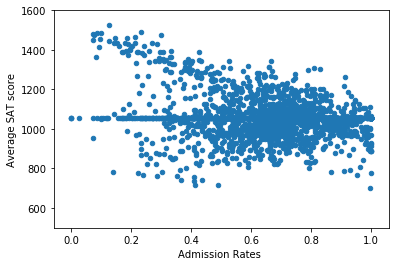

In [131]:
a = collegeDataClean.plot(kind = "scatter", x = "ADM_RATE_ALL", y = "SAT_AVG")

a.set_ylim((500, 1600 ))

a.set_ylabel("Average SAT score")
a.set_xlabel("Admission Rates ")

From the graph above we can see a trend of where admissions are between 0.6 and 1.0 that, that is where majority of the values for the SAT average lies. We do also see that the highest score belongs on the left hand side of the graph, indicating lower admission acceptance rates and the lowest average score is found on the right most hand side indicating higher admission acceptance rates


##### Q. Next we shall look at the coorelation between admission rates and  average faculty salary

Text(0.5, 0, 'Admission Rates ')

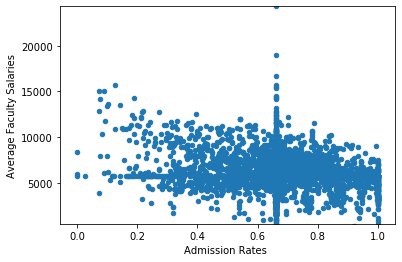

In [132]:
a = collegeDataClean.plot(kind = "scatter", x = "ADM_RATE_ALL", y = "AVGFACSAL")

a.set_ylim((500, collegeDataClean.AVGFACSAL.max() + 1 ))

a.set_ylabel("Average Faculty Salaries")
a.set_xlabel("Admission Rates ")

Again much like the graph  above this one we can see some similarities, i.e. the highest average, in this case of salaries is found in the schools with the lowest admission acceptance rate and the lowest average salaries are found in the schools with the higher admission acceptance 

##### Q. Next we are going to use a boxplot to see the relation between types of schools and the tuition fees they charge

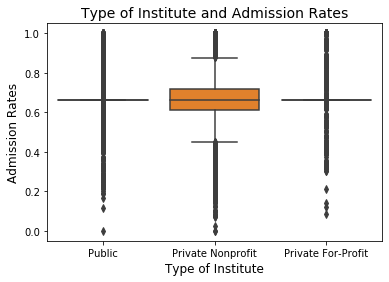

In [133]:
collegeDataClean['ADM_RATE_ALL'].fillna(0, inplace = True)
lst = []

for i in collegeDataClean['ADM_RATE_ALL']:
    lst += [i]
    
    #print(lst) 
        

sb.boxplot(data = collegeDataClean, x = 'CONTROL',y = lst)

#plt.boxplot(lst, ['Public', 'Private Nonprofit', 'Private For-Profit'], vert = True)


plt.title('Type of Institute and Admission Rates', fontsize = 14)
plt.xlabel('Type of Institute', fontsize = 12)
plt.ylabel('Admission Rates', fontsize = 12);

From the above graph we can see that the data isnt mapped properly perhaps a different graph would be better suited here

##### Q. In this part we will be using regression to see the prediction the model will make between the average Faculty salaries score and tuition fees

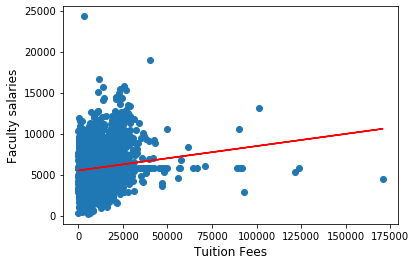

In [134]:
collegeDataClean['AVGFACSAL'].fillna(0, inplace = True)


temp=[]
for value in collegeDataClean['AVGFACSAL']:
    temp+=[value]
    
data = collegeDataClean  

Y = pd.DataFrame(temp)
X = pd.DataFrame(collegeDataClean['TUITFTE'])

Regressor = LinearRegression() 
Regressor.fit(X, Y)  

Y_pred = Regressor.predict(X)
plt.title('', fontsize = 14)

plt.xlabel('Tuition Fees', fontsize = 12)
plt.ylabel('Faculty salaries', fontsize = 12)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

From the above model we can see that the linear regression model predicts that as the tuition fees increases the average faculty salaries increase as well. However we can see from the density of the dots that this may not always be the case as the highest average faculty salary is in the ne of the lower costing schools, as far as tuition fees goes

##### Q5. In this part we will be using the hypothesis testing between average faculty salaries and average SAT score

In [135]:
collegeDataClean[['AVGFACSAL','SAT_AVG']].describe()

ttest,pval = stats.ttest_rel(collegeDataClean['AVGFACSAL'], collegeDataClean['SAT_AVG'])

print(pval)

if pval<0.05:

    print("reject null hypothesis")

else:

    print("accept null hypothesis")

0.0
reject null hypothesis
